<a href="https://colab.research.google.com/github/Arjun-R-krishnan/Household-Appliances-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About The Project

The Appliance Energy Prediction dataset is typically used for predicting energy consumption in a household or building based on various features like temperature, humidity, and time of day. The goal of such a project is often to predict the energy consumption of appliances (like air conditioners, heaters, etc.) based on environmental and situational factors.

## Dataset Informaion

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes

## Features Overview

| Variable Name   | Role    | Type       | Description | Units     | Missing Values |
|-----------------|---------|------------|-------------|-----------|----------------|
| date            | Feature | Date       |             |           | no             |
| Appliances      | Target  | Integer    |             | Wh        | no             |
| lights          | Feature | Integer    |             | Wh        | no             |
| T1              | Feature | Continuous |             | C         | no             |
| RH_1            | Feature | Continuous |             | %         | no             |
| T2              | Feature | Continuous |             | C         | no             |
| RH_2            | Feature | Continuous |             | %         | no             |
| T3              | Feature | Continuous |             | C         | no             |
| RH_3            | Feature | Continuous |             | %         | no             |
| T4              | Feature | Continuous |             | C         | no             |
| RH_4            | Feature | Continuous |             | %         | no             |
| T5              | Feature | Continuous |             | C         | no             |
| RH_5            | Feature | Continuous |             | %         | no             |
| T6              | Feature | Continuous |             | C         | no             |
| RH_6            | Feature | Continuous |             | %         | no             |
| T7              | Feature | Continuous |             | C         | no             |
| RH_7            | Feature | Continuous |             | %         | no             |
| T8              | Feature | Continuous |             | C         | no             |
| RH_8            | Feature | Continuous |             | %         | no             |
| T9              | Feature | Continuous |             | C         | no             |
| RH_9            | Feature | Continuous |             | %         | no             |
| T_out           | Feature | Continuous |             | C         | no             |
| Press_mm_hg     | Feature | Continuous |             | mm Hg     | no             |
| RH_out          | Feature | Continuous |             | %         | no             |
| Windspeed       | Feature | Continuous |             | m/s       | no             |
| Visibility      | Feature | Continuous |             | km        | no             |
| Tdewpoint       | Feature | Continuous |             | C         | no             |
| rv1             | Feature | Continuous |             |           | no             |
| rv2             | Feature | Continuous |             |           | no             |	no

## Data Preprocessing

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
# Raw URL of the CSV file
url = "https://raw.githubusercontent.com/Arjun-R-krishnan/Household-Appliances-Energy-Prediction/main/Appliances_Energy.csv"

# Load the CSV file
data = pd.read_csv(url)

# Display the first few rows
print(data.head())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [3]:
df = data

In [4]:
# Displays the first 5 rows of the DataFrame
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# Displays concise summary of the DataFrame,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
# Provides a statistical summary of the numeric columns in the DataFrame
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
# Renaming the short form column names to the long form
df = df.rename(columns={'date':'DateTime','Appliances':'Appliances(Wh)','lights':'Lights(Wh)','T1':'Kitchen_temp', 'RH_1':'Kitchen_humidity', 'T2':'Liv_room_temp', 'RH_2':'Liv_room_humidity', 'T3':'Laundary_room_temp.',
       'RH_3':'Laundary_room_humidity', 'T4':'Office_room_temp', 'RH_4':'Office_room_humd', 'T5':'bathroom_temp', 'RH_5':'bathroom_humd', 'T6':'Outside_build_temp', 'RH_6':'Outside_build_humd', 'T7':'iron_room_temp', 'RH_7':'iron_room_humd', 'T8':'teen_room_temp',
       'RH_8':'teen_room_humd', 'T9':'parent_room_temp', 'RH_9':'parent_room_humd'})

In [8]:
df.head()

,DateTime,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Checking for null values

In [9]:
# Checks for missing (null) values in the DataFrame and sums them up for each column
df.isnull().sum()

,0
DateTime,0
Appliances(Wh),0
Lights(Wh),0
Kitchen_temp,0
Kitchen_humidity,0
Liv_room_temp,0
Liv_room_humidity,0
Laundary_room_temp.,0
Laundary_room_humidity,0
Office_room_temp,0


This dataset does not contain any null values

## Checking for dulicated rows

In [10]:
# Returns rows in the DataFrame that are duplicates, based on all columns
df[df.duplicated()]

,DateTime,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2


This dataset does not contain any duplicate values

## For enhanced data exploration, the object-type 'date' column has been converted to the datetime format.

In [11]:
# Converts the 'DateTime' column to datetime format, ensuring that pandas recognizes it as a date and time object
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Extracts just the date part from the 'DateTime' column and creates a new column 'Date'
df['Date'] = df['DateTime'].dt.date


In [12]:
# Adding more precised datetime columns
df['month'] = df['DateTime'].dt.month
df['weekday'] = df['DateTime'].dt.weekday
df['time'] = df['DateTime'].dt.time
df['hour'] = df['DateTime'].dt.hour

In [13]:
# Converting the  columns to string (str) type
df['time'] = df['time'].astype(str)
df['DateTime'] = df['DateTime'].astype(str)
df['Date'] = df['Date'].astype(str)

## For better data exploration, an additional column named 'shift' has been created by extracting information from the 'time' column.

In [14]:
# Define the conditions based on the 'hour' column to classify into different time shifts
conditions = [
    (df['hour']>=17) & (df['hour']<20),         # Evening: 17:00 - 19:59
    (df['hour']>=20) & (df['hour']<24),         # Night: 20:00 - 23:59
    (df['hour']>=0) & (df['hour']<3),           # Late Night: 00:00 - 02:59
    (df['hour']>=3) & (df['hour']<7),           # Early Morning: 03:00 - 06:59
    (df['hour']>=7) & (df['hour']<11),          # Morning: 07:00 - 10:59
    (df['hour']>=11) & (df['hour']<17),         # Afternoon: 11:00 - 16:59
]

# Define the corresponding values for the conditions
values = ['Evening','Night','Late Night','Early Morning','Morning','Afternoon']


In [15]:
df['shift'] = np.select(conditions, values)

In [16]:
df.head()

,DateTime,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,Visibility,Tdewpoint,rv1,rv2,Date,month,weekday,time,hour,shift
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,63.000000,5.3,13.275433,13.275433,2016-01-11,1,0,17:00:00,17,Evening
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,59.166667,5.2,18.606195,18.606195,2016-01-11,1,0,17:10:00,17,Evening
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,55.333333,5.1,28.642668,28.642668,2016-01-11,1,0,17:20:00,17,Evening
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,51.500000,5.0,45.410389,45.410389,2016-01-11,1,0,17:30:00,17,Evening
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,47.666667,4.9,10.084097,10.084097,2016-01-11,1,0,17:40:00,17,Evening


In [17]:
#Since the 'DateTime', 'Date', 'time', and 'hour' columns are not required for further analysiss deleting from the  DataFrame.
df.drop(['DateTime', 'Date', 'time', 'hour'], axis=1, inplace=True)


In [18]:
df.describe()

,Appliances(Wh),Lights(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000


## Based on the analysis of the columns, it has been observed that 75% of the values in the 'light' column are zeros. Therefore, the 'light' column has been removed from the dataset.

In [19]:
df.drop(['Lights(Wh)'], axis=1, inplace=True)

# Data Visualization

## To facilitate a thorough exploration of the data, histograms with kernel density estimation (KDE) are plotted for each numerical feature in the dataset, allowing for a detailed analysis of their distributions.

In [20]:
# Selects the columns with numeric data types (either integer or float) from the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

In [21]:
numeric_columns

Index(['Appliances(Wh)', 'Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp',
       'Liv_room_humidity', 'Laundary_room_temp.', 'Laundary_room_humidity',
       'Office_room_temp', 'Office_room_humd', 'bathroom_temp',
       'bathroom_humd', 'Outside_build_temp', 'Outside_build_humd',
       'iron_room_temp', 'iron_room_humd', 'teen_room_temp', 'teen_room_humd',
       'parent_room_temp', 'parent_room_humd', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'month',
       'weekday'],
      dtype='object')

## Disribution od features before transformation

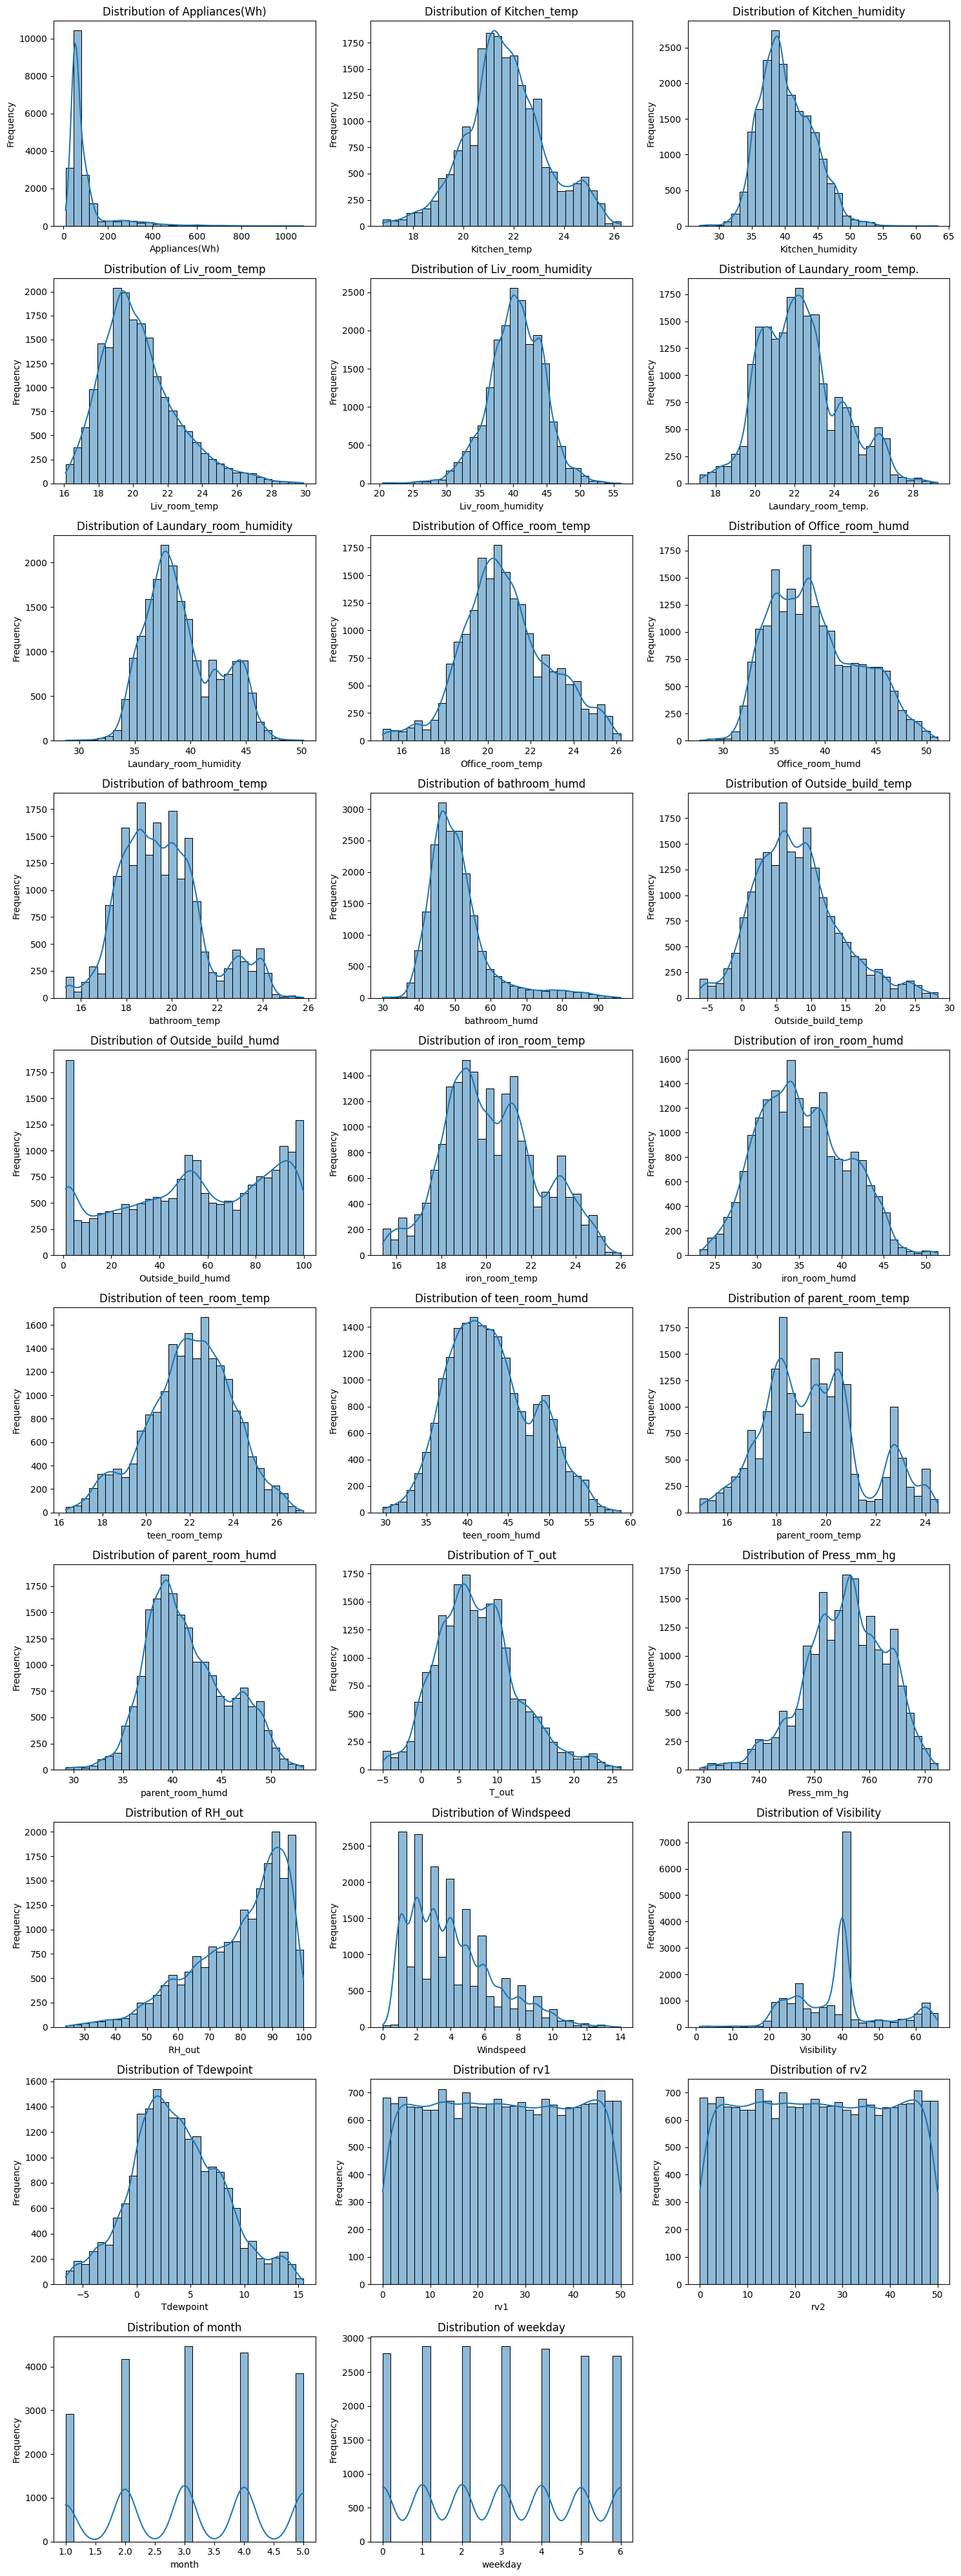

In [22]:
n_cols = 3
# Calculate the number of rows
n_rows = math.ceil(len(numeric_columns) / n_cols)
# Creating  subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Checking he skewness of the features

In [23]:
skewness_values = df[numeric_columns].skew()


In [24]:
# Loops through each column and its corresponding skewness value in the 'skewness_values' dictionar
for column, skewness in skewness_values.items():
    print(f"Skewness of '{column}': {skewness:.2f}")

Skewness of 'Appliances(Wh)': 3.39
Skewness of 'Kitchen_temp': 0.12
Skewness of 'Kitchen_humidity': 0.47
Skewness of 'Liv_room_temp': 0.89
Skewness of 'Liv_room_humidity': -0.27
Skewness of 'Laundary_room_temp.': 0.45
Skewness of 'Laundary_room_humidity': 0.47
Skewness of 'Office_room_temp': 0.17
Skewness of 'Office_room_humd': 0.44
Skewness of 'bathroom_temp': 0.56
Skewness of 'bathroom_humd': 1.87
Skewness of 'Outside_build_temp': 0.60
Skewness of 'Outside_build_humd': -0.24
Skewness of 'iron_room_temp': 0.25
Skewness of 'iron_room_humd': 0.24
Skewness of 'teen_room_temp': -0.26
Skewness of 'teen_room_humd': 0.31
Skewness of 'parent_room_temp': 0.38
Skewness of 'parent_room_humd': 0.37
Skewness of 'T_out': 0.53
Skewness of 'Press_mm_hg': -0.42
Skewness of 'RH_out': -0.92
Skewness of 'Windspeed': 0.86
Skewness of 'Visibility': 0.44
Skewness of 'Tdewpoint': 0.24
Skewness of 'rv1': 0.00
Skewness of 'rv2': 0.00
Skewness of 'month': -0.07
Skewness of 'weekday': 0.02


## Transforming the skewed features

In [25]:
df['Appliances(Wh)'] = np.log1p(df['Appliances(Wh)'])
df['bathroom_humd'] = np.log1p(df['bathroom_humd'])
df['Liv_room_temp'] = np.log1p(df['Liv_room_temp'])
df['bathroom_temp'] = np.sqrt(df['bathroom_temp'])
df['RH_out']        = np.log1p(df['RH_out'])
df['Windspeed'] = np.sqrt(df['Windspeed'])

In [26]:
skewness_values = df[numeric_columns].skew()
#checking skewness after ransformation
for column, skewness in skewness_values.items():
    print(f"Skewness of '{column}': {skewness:.2f}")

Skewness of 'Appliances(Wh)': 1.19
Skewness of 'Kitchen_temp': 0.12
Skewness of 'Kitchen_humidity': 0.47
Skewness of 'Liv_room_temp': 0.59
Skewness of 'Liv_room_humidity': -0.27
Skewness of 'Laundary_room_temp.': 0.45
Skewness of 'Laundary_room_humidity': 0.47
Skewness of 'Office_room_temp': 0.17
Skewness of 'Office_room_humd': 0.44
Skewness of 'bathroom_temp': 0.43
Skewness of 'bathroom_humd': 1.21
Skewness of 'Outside_build_temp': 0.60
Skewness of 'Outside_build_humd': -0.24
Skewness of 'iron_room_temp': 0.25
Skewness of 'iron_room_humd': 0.24
Skewness of 'teen_room_temp': -0.26
Skewness of 'teen_room_humd': 0.31
Skewness of 'parent_room_temp': 0.38
Skewness of 'parent_room_humd': 0.37
Skewness of 'T_out': 0.53
Skewness of 'Press_mm_hg': -0.42
Skewness of 'RH_out': -1.52
Skewness of 'Windspeed': 0.26
Skewness of 'Visibility': 0.44
Skewness of 'Tdewpoint': 0.24
Skewness of 'rv1': 0.00
Skewness of 'rv2': 0.00
Skewness of 'month': -0.07
Skewness of 'weekday': 0.02


In [27]:
#since the skewness of 'Appliances' and 'bathroom temp' is still highy transformig the column once more

df['Appliances(Wh)'] = np.log1p(df['Appliances(Wh)'])

df['bathroom_humd'] = np.log1p(df['bathroom_humd'])


In [28]:
skewness_values = df[numeric_columns].skew()
#checking skewness after ransformation
for column, skewness in skewness_values.items():
    print(f"Skewness of '{column}': {skewness:.2f}")

Skewness of 'Appliances(Wh)': 0.80
Skewness of 'Kitchen_temp': 0.12
Skewness of 'Kitchen_humidity': 0.47
Skewness of 'Liv_room_temp': 0.59
Skewness of 'Liv_room_humidity': -0.27
Skewness of 'Laundary_room_temp.': 0.45
Skewness of 'Laundary_room_humidity': 0.47
Skewness of 'Office_room_temp': 0.17
Skewness of 'Office_room_humd': 0.44
Skewness of 'bathroom_temp': 0.43
Skewness of 'bathroom_humd': 1.08
Skewness of 'Outside_build_temp': 0.60
Skewness of 'Outside_build_humd': -0.24
Skewness of 'iron_room_temp': 0.25
Skewness of 'iron_room_humd': 0.24
Skewness of 'teen_room_temp': -0.26
Skewness of 'teen_room_humd': 0.31
Skewness of 'parent_room_temp': 0.38
Skewness of 'parent_room_humd': 0.37
Skewness of 'T_out': 0.53
Skewness of 'Press_mm_hg': -0.42
Skewness of 'RH_out': -1.52
Skewness of 'Windspeed': 0.26
Skewness of 'Visibility': 0.44
Skewness of 'Tdewpoint': 0.24
Skewness of 'rv1': 0.00
Skewness of 'rv2': 0.00
Skewness of 'month': -0.07
Skewness of 'weekday': 0.02


## The 'RH out' column has been transformed using the Box-Cox transformation to stabilize variance and achieve a more normal distribution

In [29]:
df['RH_box_cox'] = df['RH_out'] + abs(df['RH_out'].min()) + 1  # Shift to ensure positivity

# Apply Box-Cox transformation
df['RH_out'], _ = stats.boxcox(df['RH_box_cox'])

In [30]:
skewness_values = df[numeric_columns].skew()
#checking skewness after ransformation
for column, skewness in skewness_values.items():
    print(f"Skewness of '{column}': {skewness:.2f}")

Skewness of 'Appliances(Wh)': 0.80
Skewness of 'Kitchen_temp': 0.12
Skewness of 'Kitchen_humidity': 0.47
Skewness of 'Liv_room_temp': 0.59
Skewness of 'Liv_room_humidity': -0.27
Skewness of 'Laundary_room_temp.': 0.45
Skewness of 'Laundary_room_humidity': 0.47
Skewness of 'Office_room_temp': 0.17
Skewness of 'Office_room_humd': 0.44
Skewness of 'bathroom_temp': 0.43
Skewness of 'bathroom_humd': 1.08
Skewness of 'Outside_build_temp': 0.60
Skewness of 'Outside_build_humd': -0.24
Skewness of 'iron_room_temp': 0.25
Skewness of 'iron_room_humd': 0.24
Skewness of 'teen_room_temp': -0.26
Skewness of 'teen_room_humd': 0.31
Skewness of 'parent_room_temp': 0.38
Skewness of 'parent_room_humd': 0.37
Skewness of 'T_out': 0.53
Skewness of 'Press_mm_hg': -0.42
Skewness of 'RH_out': -0.27
Skewness of 'Windspeed': 0.26
Skewness of 'Visibility': 0.44
Skewness of 'Tdewpoint': 0.24
Skewness of 'rv1': 0.00
Skewness of 'rv2': 0.00
Skewness of 'month': -0.07
Skewness of 'weekday': 0.02


In [31]:
# removing the RH_box_cox column
df.drop(['RH_box_cox'], axis=1, inplace=True)

## Disribution od features after transformation

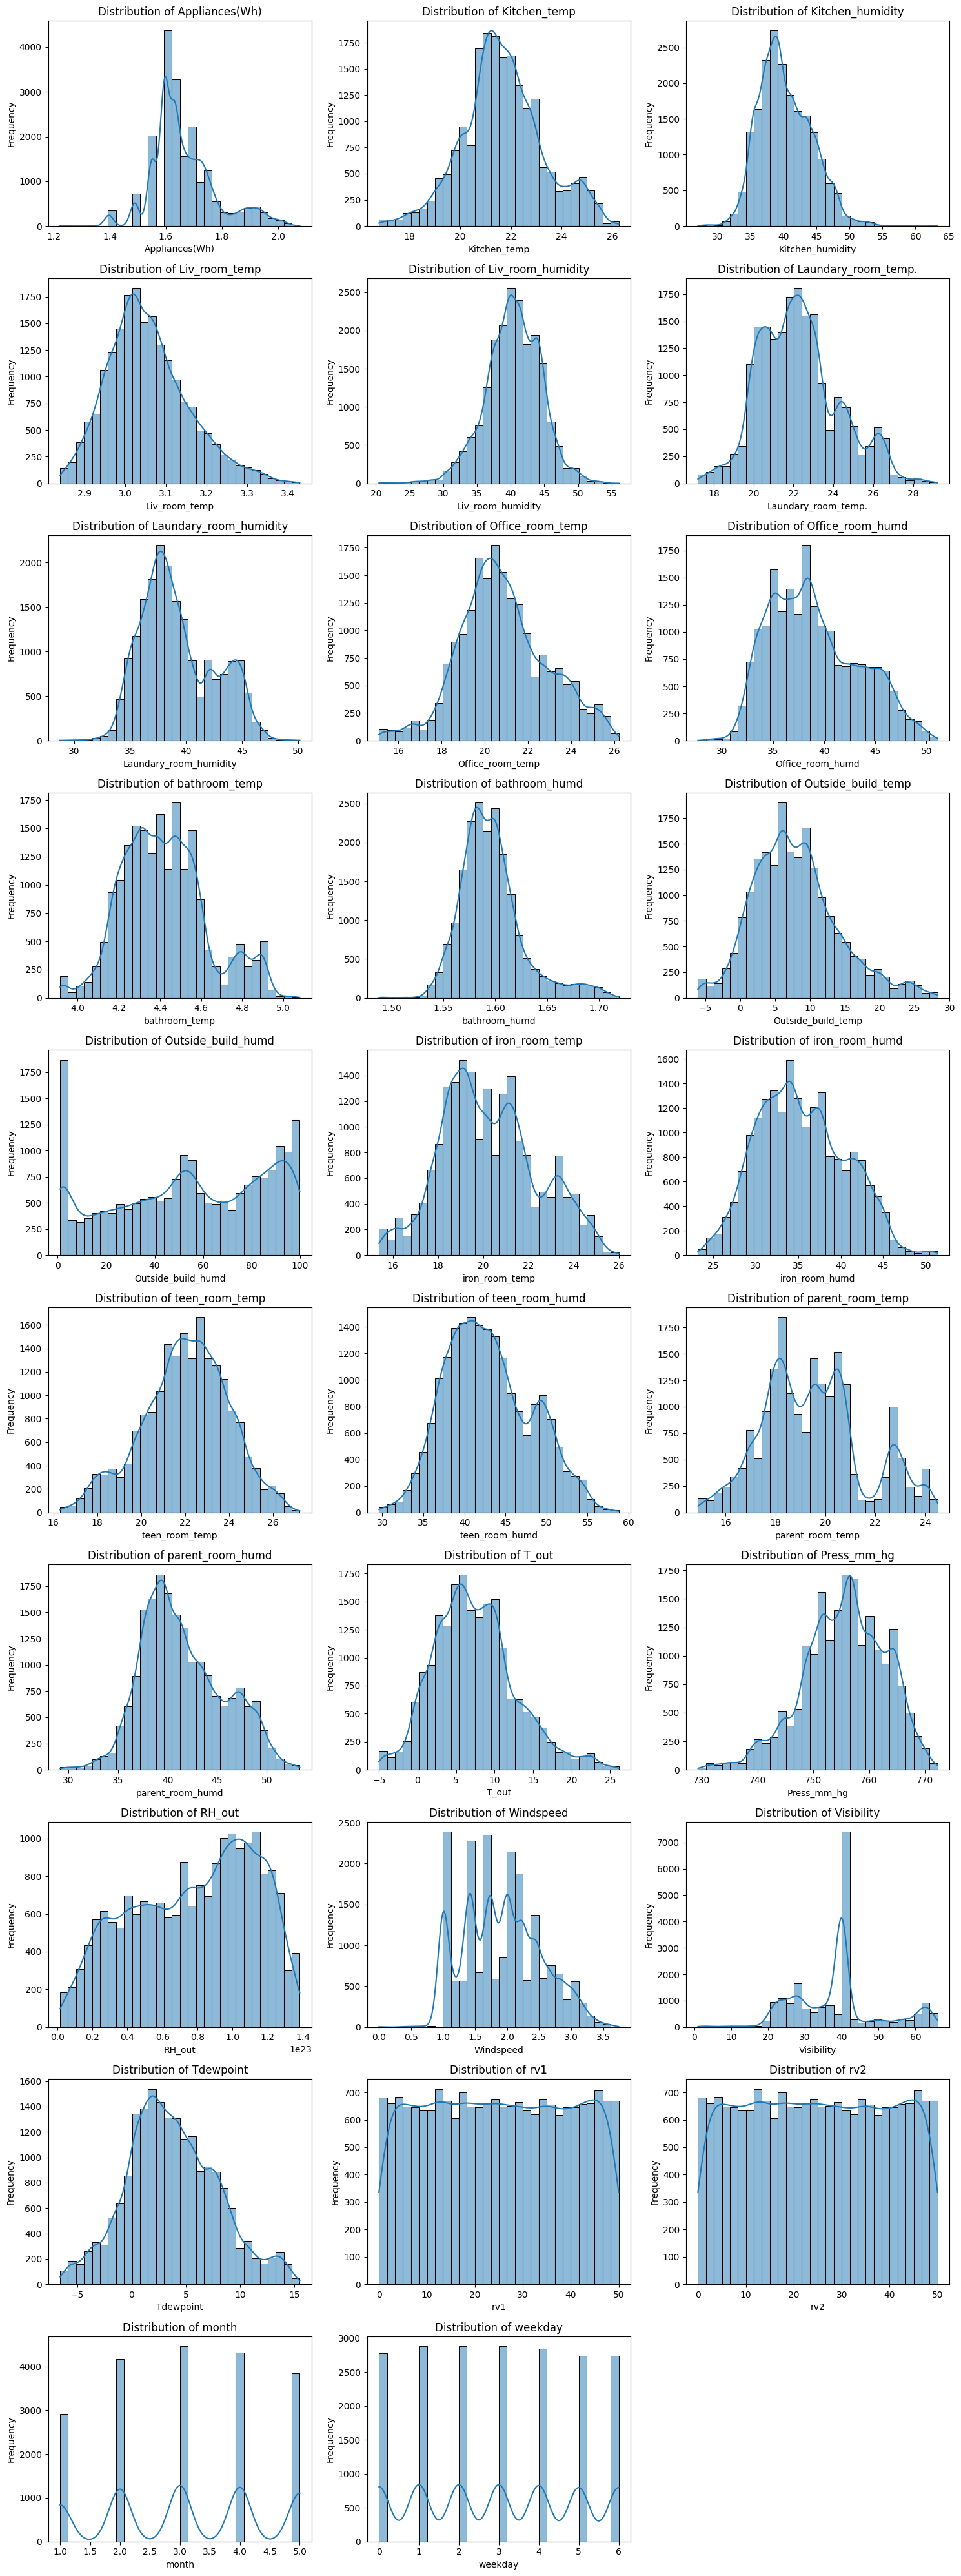

In [32]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Outliers for each feature are checked visually using boxplots,This method allows for a clear visual identification of potential outliers across all features.








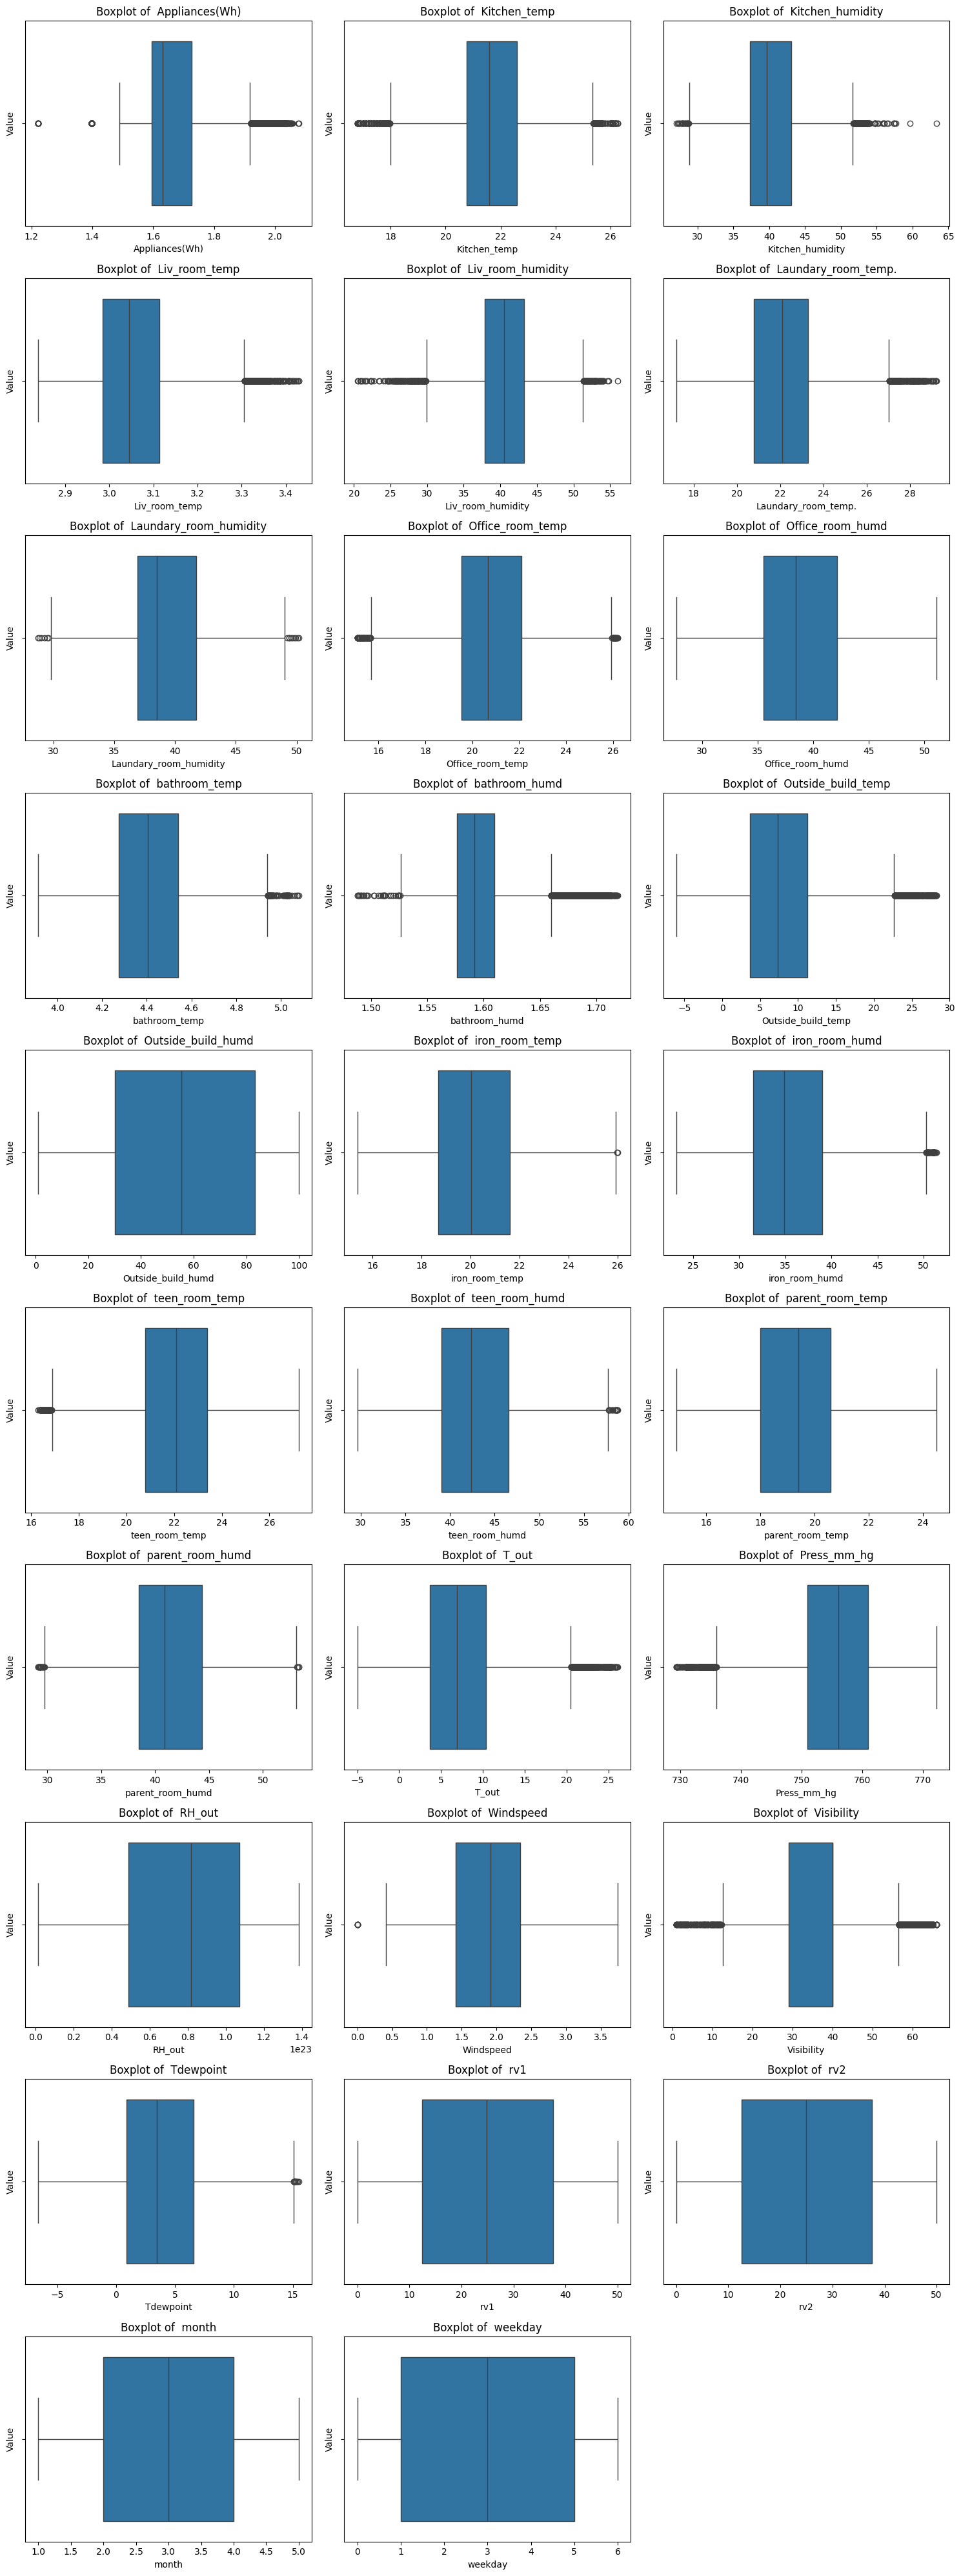

In [33]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to handle axes indexing easily

# Plot boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of  {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Handling Outliers

## Outliers are handled using the Z-score method, which identifies values that deviate significantly from the mean of a feature. Values with a Z-score greater than a threshold  are considered outliers and can be treated by  capping them

In [34]:
#creating a copy of the dataframe
z_score_df = df.copy()

In [35]:
#selecting the column to handle outliers
numeric_columns_z= df.select_dtypes(include=[np.number]).columns

In [38]:
for col in numeric_columns_z :                                 # loop through every column in zdf
    z_score = zscore(z_score_df[col])                          # calculate the Z-score for the column
    outlier_mask = np.abs(z_score) > 3                         # make mask of outliers
    upper_bound = z_score_df[col][~outlier_mask].max()         # invert the mask and get the max of non outlier value
    lower_bound = z_score_df[col][~outlier_mask].min()         # invert the mask and get the min of non outlier value
    z_score_df[col] = np.where(z_score > 3, upper_bound, np.where(z_score < -3, lower_bound, z_score_df[col])) # cap the outlier values


In [40]:
z_score_df.describe()

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,1.973500e+04,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,1.664465,21.686632,40.252778,3.055455,40.431089,22.266633,39.242272,20.855335,39.026904,4.421475,...,7.405980,755.532179,7.764697e+22,1.916758,38.333114,3.760707,24.988033,24.988033,3.101647,2.977249
std,0.115384,1.605882,3.952403,0.099114,4.023204,2.003038,3.253221,2.042884,4.341321,0.206392,...,5.299429,7.369115,3.498628e+22,0.604841,11.787739,4.194648,14.496634,14.496634,1.339200,1.985617
min,1.397363,16.890000,28.400000,2.839078,28.223333,17.200000,29.493333,15.100000,27.660000,3.915354,...,-5.000000,733.350000,1.591016e+21,0.408248,3.000000,-6.600000,0.005322,0.005322,1.000000,0.000000
25%,1.595709,20.760000,37.333333,2.985177,37.900000,20.790000,36.900000,19.530000,35.530000,4.275219,...,3.666667,750.933333,4.875871e+22,1.414214,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000
50%,1.631370,21.600000,39.656667,3.044522,40.500000,22.100000,38.530000,20.666667,38.400000,4.403408,...,6.916667,756.100000,8.191672e+22,1.914854,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000
75%,1.725463,22.600000,43.066667,3.113515,43.260000,23.290000,41.760000,22.100000,42.156667,4.540886,...,10.408333,760.933333,1.072269e+23,2.345208,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000
max,2.012034,26.260000,52.193333,3.353407,52.626667,28.277143,48.966667,26.200000,51.090000,5.038849,...,23.350000,772.300000,1.382640e+23,3.674235,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000


# Boxplot of the numerical features after caping with z score

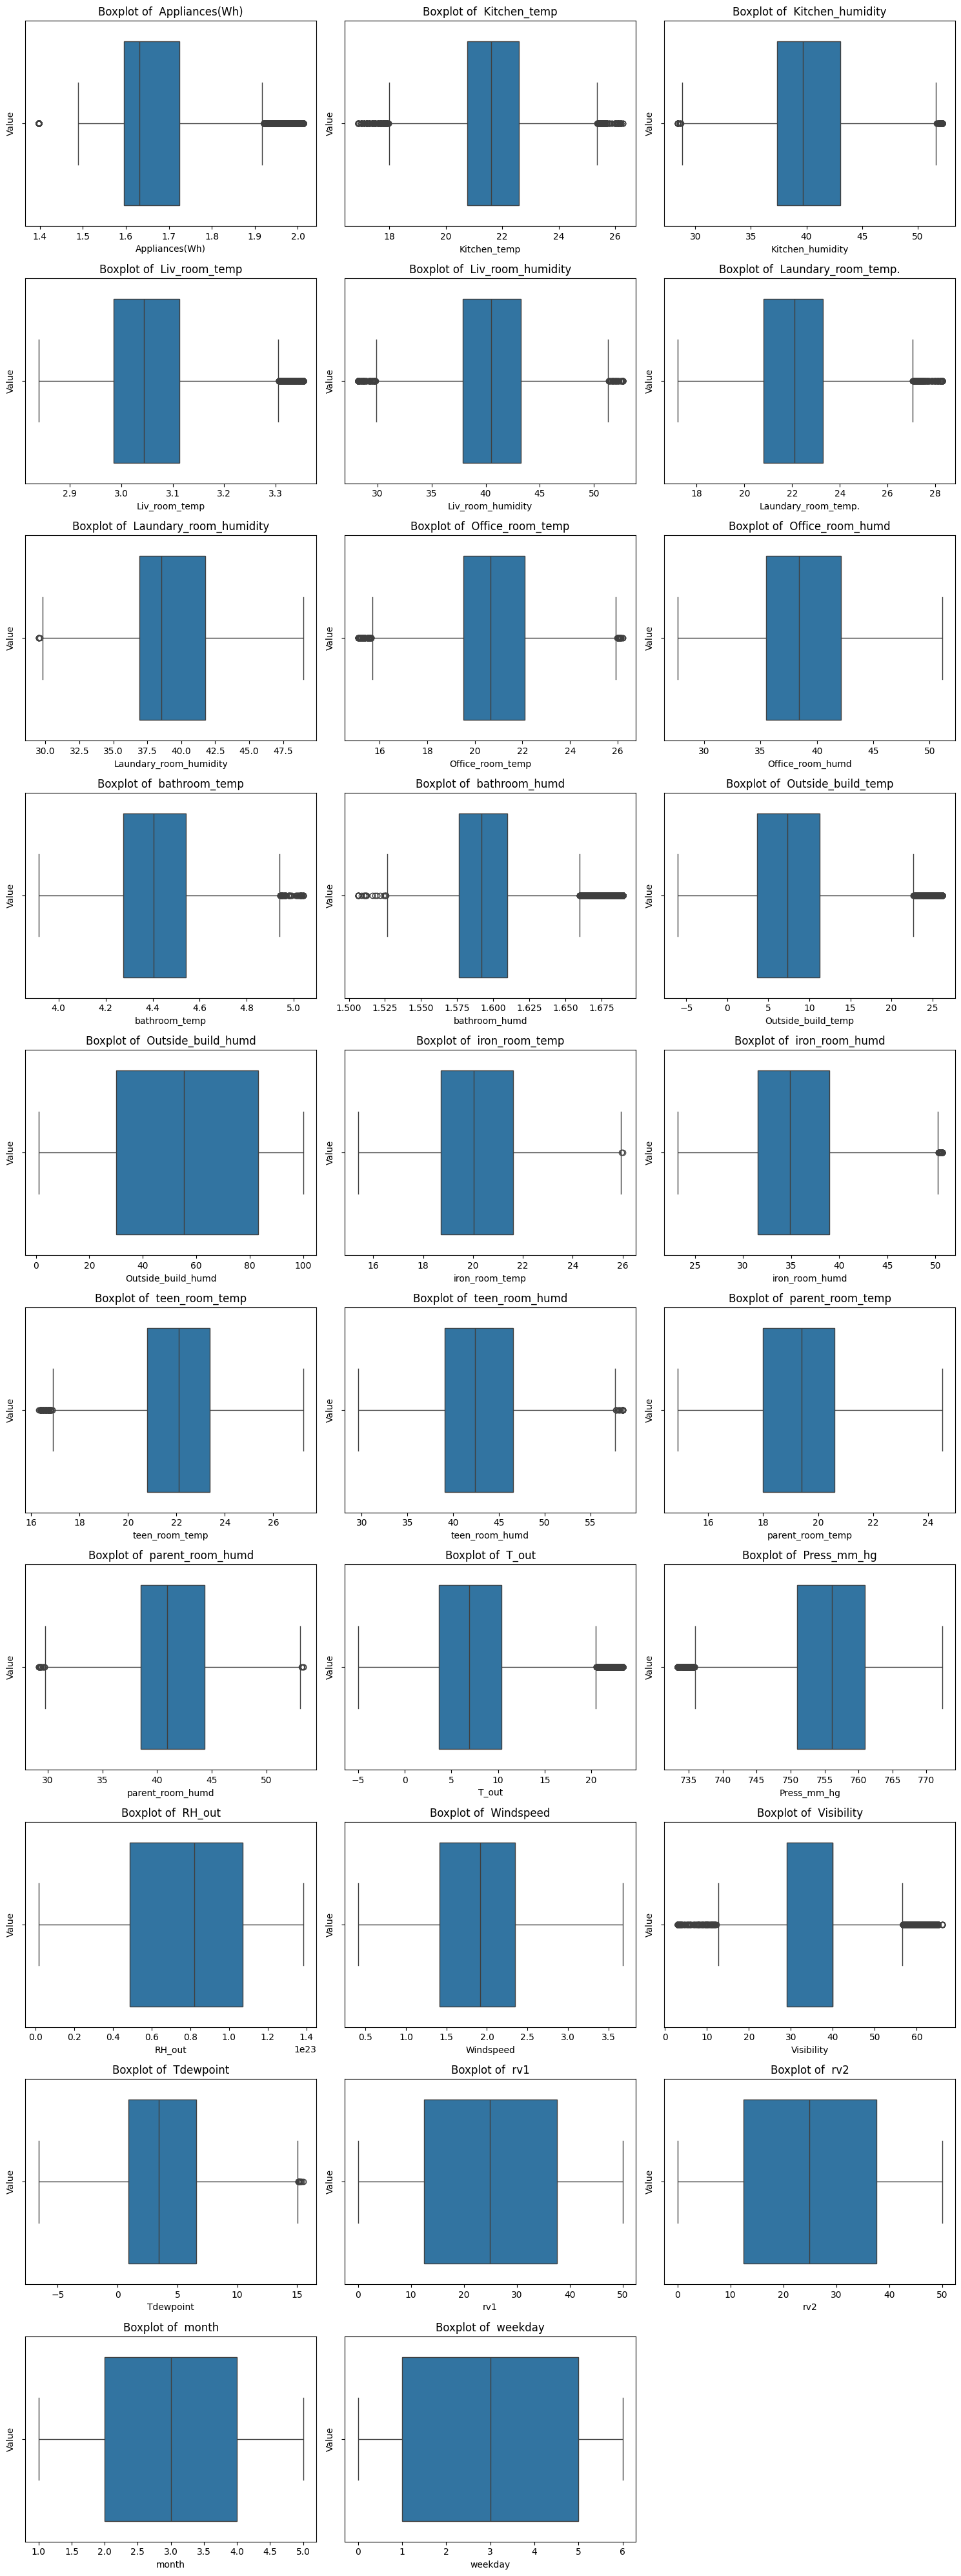

In [41]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
# Flatten to handle axes indexing easily
axes = axes.flatten()

# Plot boxplots
for i, column in enumerate(numeric_columns_z):
    sns.boxplot(data=z_score_df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of  {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Outliers handling using the Interquartile Range (IQR) method

The IQR is the range between the 25th (Q1) and 75th (Q3) percentiles, and outliers are typically defined as data points outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

In [42]:
# make a df copy to make outlier capped df with IQR methode
IQR_df = df.copy()

In [43]:
numeric_columns_iqr= df.select_dtypes(include=[np.number]).columns

In [46]:
for col in numeric_columns_iqr:
    Q1 = IQR_df[col].quantile(0.25)
    Q3 = IQR_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    IQR_df[col] = np.where(IQR_df[col] < lower_bound, lower_bound, np.where(IQR_df[col] > upper_bound, upper_bound, IQR_df[col]))

In [47]:
IQR_df.describe()

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,1.973500e+04,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,1.662578,21.689928,40.249990,3.054948,40.438762,22.259048,39.242344,20.857620,39.026904,4.421321,...,7.367806,755.553294,7.764697e+22,1.916643,37.745520,3.760621,24.988033,24.988033,3.101647,2.977249
std,0.110237,1.580210,3.942554,0.097723,3.982628,1.982974,3.253254,2.035499,4.341321,0.205977,...,5.195833,7.309428,3.498628e+22,0.605185,10.419724,4.194413,14.496634,14.496634,1.339200,1.985617
min,1.401078,18.000000,28.733333,2.839078,29.860000,17.200000,29.610000,15.675000,27.660000,3.915354,...,-5.000000,735.933333,1.591016e+21,0.017722,12.500000,-6.600000,0.005322,0.005322,1.000000,0.000000
25%,1.595709,20.760000,37.333333,2.985177,37.900000,20.790000,36.900000,19.530000,35.530000,4.275219,...,3.666667,750.933333,4.875871e+22,1.414214,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000
50%,1.631370,21.600000,39.656667,3.044522,40.500000,22.100000,38.530000,20.666667,38.400000,4.403408,...,6.916667,756.100000,8.191672e+22,1.914854,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000
75%,1.725463,22.600000,43.066667,3.113515,43.260000,23.290000,41.760000,22.100000,42.156667,4.540886,...,10.408333,760.933333,1.072269e+23,2.345208,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000
max,1.920094,25.360000,51.666667,3.306023,51.300000,27.040000,49.050000,25.955000,51.090000,4.939385,...,20.520833,772.300000,1.382640e+23,3.741657,56.500000,15.066667,49.996530,49.996530,5.000000,6.000000


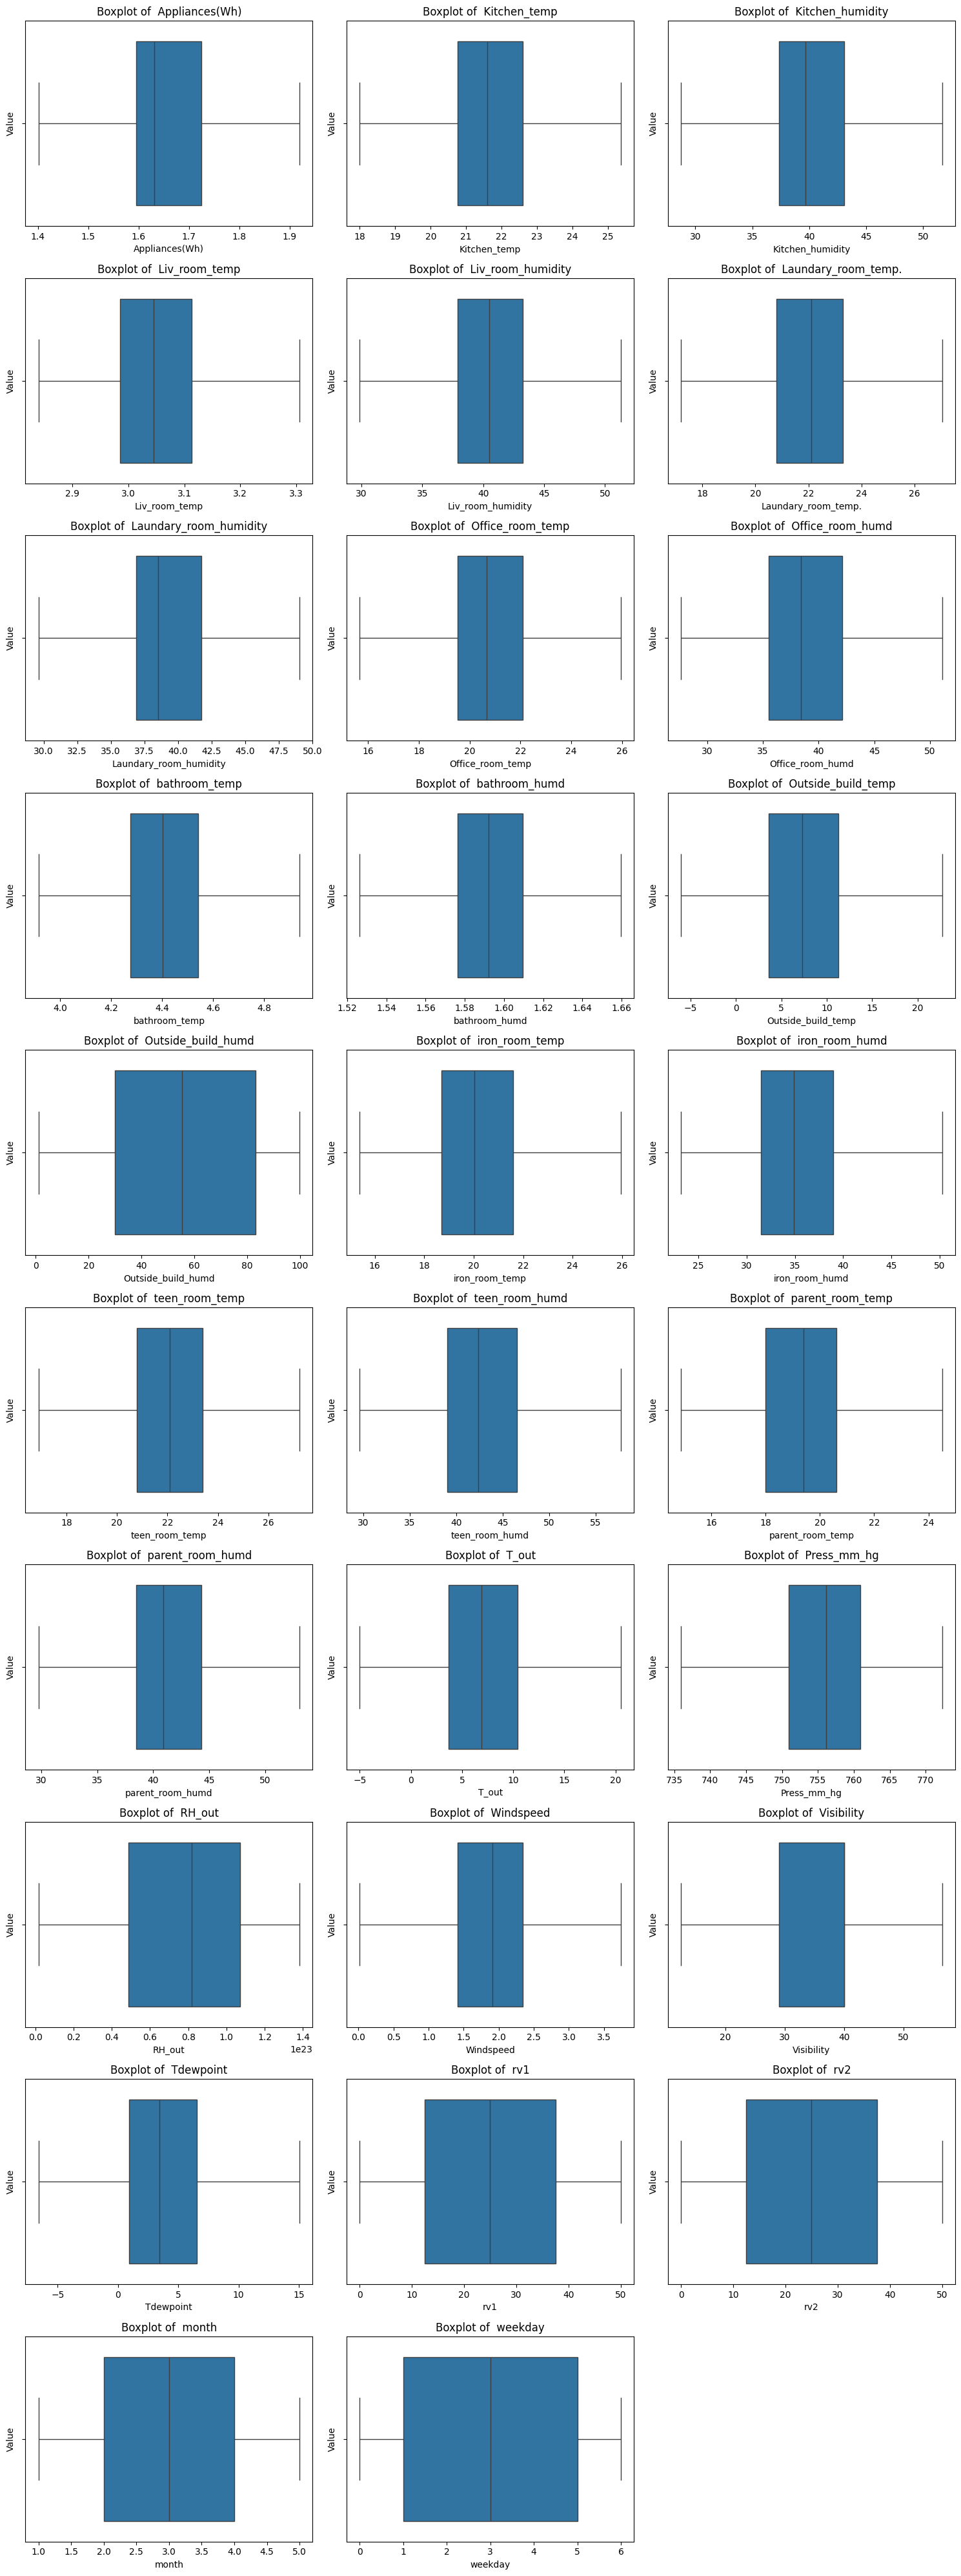

In [48]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
# Flatten to handle axes indexing easily
axes = axes.flatten()

# Plot boxplots
for i, column in enumerate(numeric_columns_iqr):
    sns.boxplot(data=IQR_df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of  {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Based on the visualizations after handling outliers, it is evident that the IQR method works better for this dataset, as it more effectively removes extreme values without distorting the overall distribution of the features.

## Distribution of the numeric features after handling the ouliers IQR

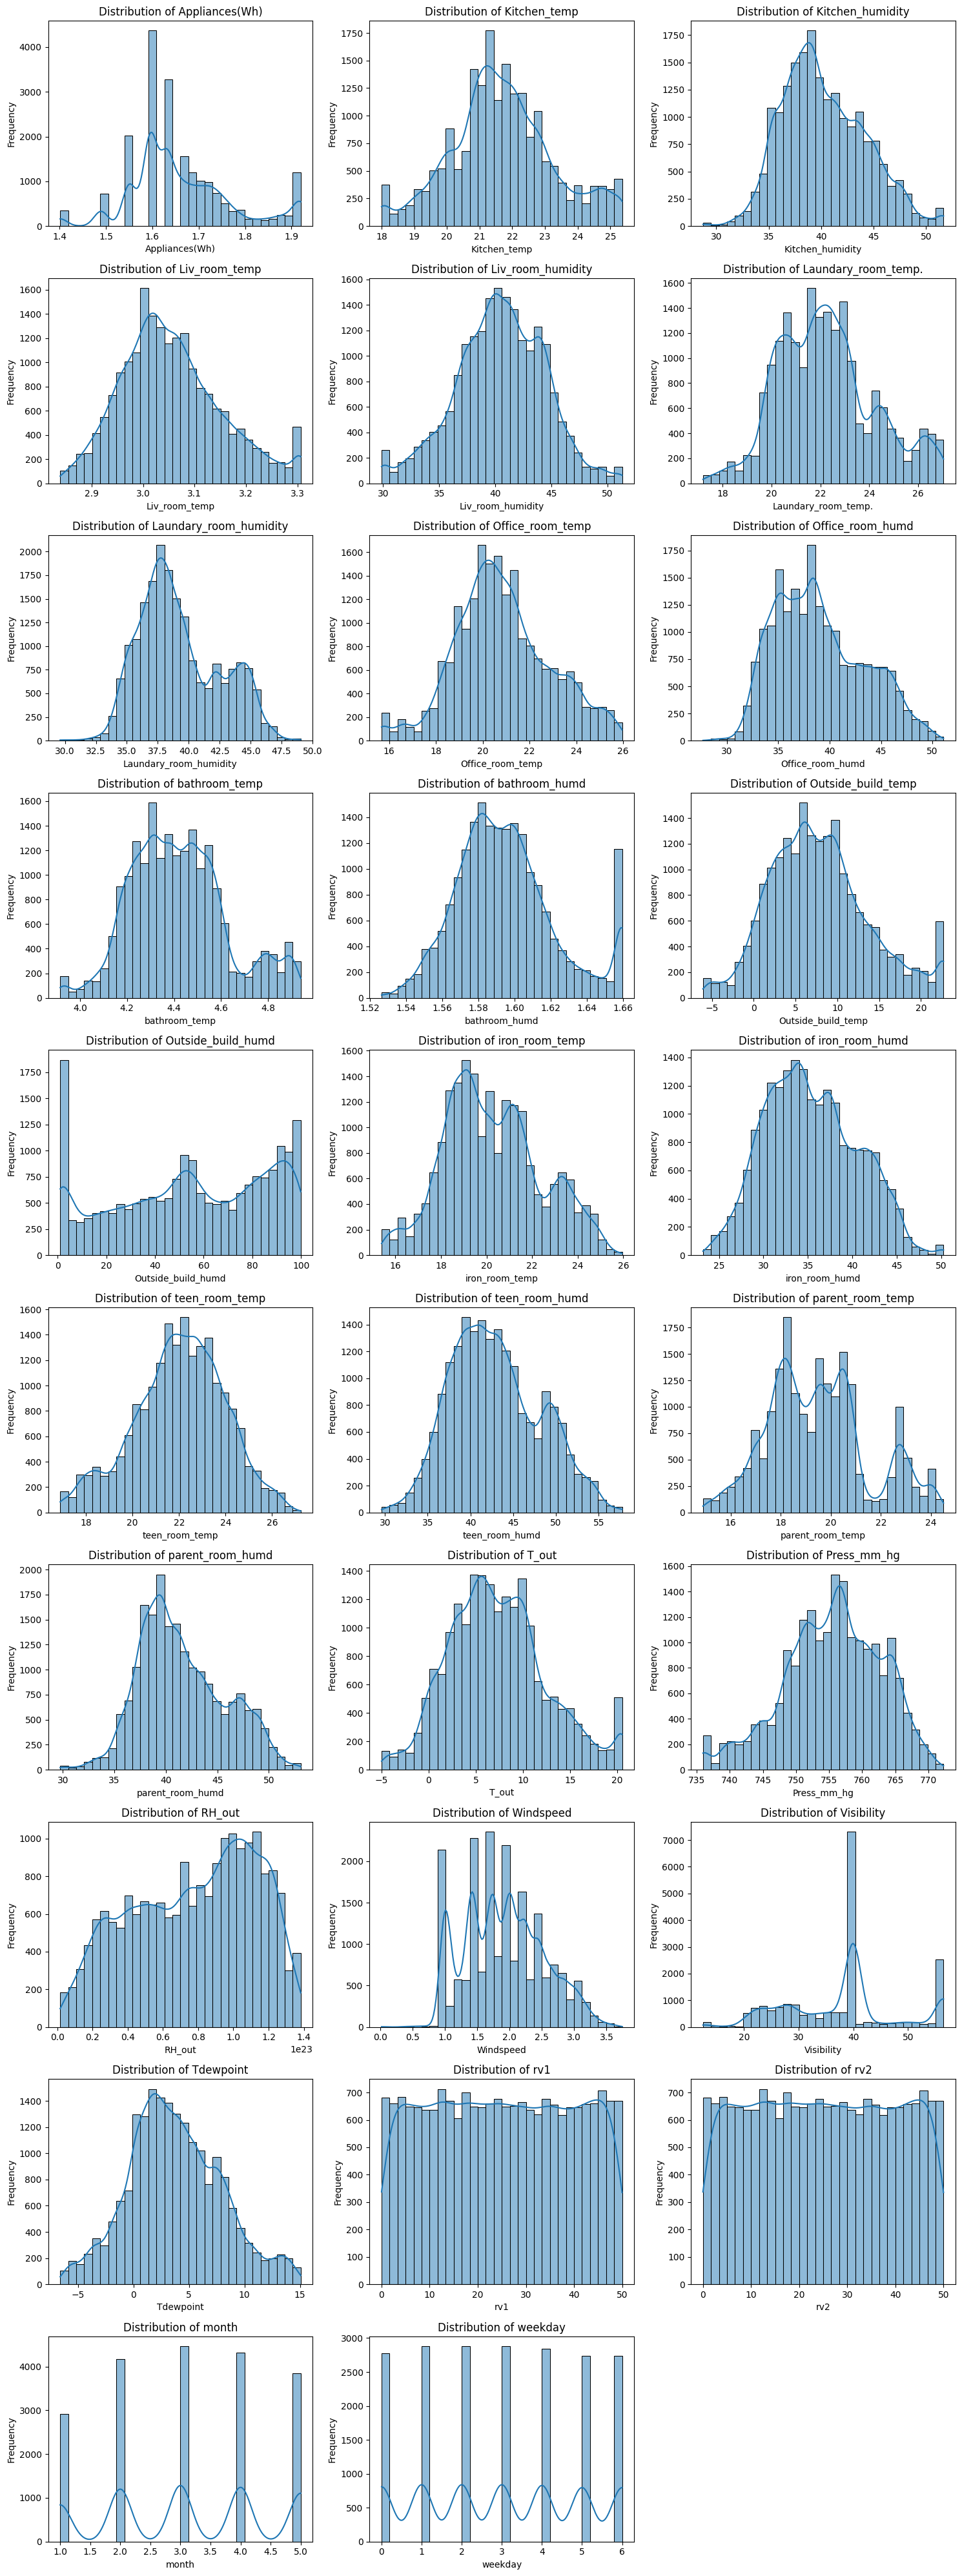

In [49]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to handle axes indexing easily

# Plot histograms
for i, column in enumerate(numeric_columns_iqr):
    sns.histplot(IQR_df[column], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Encoding of categoriacl values

## In this dataset, the only categorical feature is 'Shift', which was generated from the 'time' column. The 'Shift' column categorizes the time of day into distinct periods such as Morning, Afternoon, Evening, etc., based on the hour extracted from the 'time' feature.

In [51]:
#creating a copy of the Iqr df for encoding
encoded_df = IQR_df

In [52]:
# Creates a dictionary that maps each shift (time period) to a numerical value
size_mapping = {'Early Morning': 1, 'Morning': 2, 'Afternoon': 3,'Evening':4,'Night':5,'Late Night':6}

In [53]:
# Maps the 'shift' column values to their corresponding numeric values using the 'size_mapping' dictionary
encoded_df['Shift_Encoded'] = encoded_df['shift'].map(size_mapping)

In [54]:
encoded_df['Shift_Encoded'].value_counts()

,count
Shift_Encoded,
3,4932
5,3288
1,3288
2,3288
4,2473
6,2466


In [55]:
# removing the shift  column
encoded_df.drop(['shift'], axis=1, inplace=True)

## Corealion Matrix

In [56]:
# Computes the correlation matrix of the numeric columns in the DataFrame
correaltion_marix = encoded_df.corr()

In [57]:
correaltion_marix

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,Shift_Encoded
Appliances(Wh),1.000000,0.189152,0.078639,0.243033,-0.101949,0.184070,-0.019593,0.157904,-0.013818,0.135286,...,-0.080469,-0.243687,0.099692,-0.006533,0.067807,-0.009571,-0.009571,0.089500,0.021984,0.055066
Kitchen_temp,0.189152,1.000000,0.167434,0.849220,0.005000,0.892897,-0.026010,0.875136,0.101494,0.886374,...,-0.146596,-0.314856,-0.077993,-0.062307,0.578157,-0.006008,-0.006008,0.708016,0.004403,0.204439
Kitchen_humidity,0.078639,0.167434,1.000000,0.276760,0.799038,0.250162,0.847233,0.107189,0.884049,0.199220,...,-0.296579,0.245948,0.198829,-0.012246,0.641725,-0.001551,-0.001551,-0.095190,-0.055991,-0.012977
Liv_room_temp,0.243033,0.849220,0.276760,1.000000,-0.140920,0.737019,0.129491,0.764997,0.240875,0.723083,...,-0.138466,-0.465261,0.085643,-0.056650,0.583572,-0.010069,-0.010069,0.527522,-0.004476,0.156929
Liv_room_humidity,-0.101949,0.005000,0.799038,-0.140920,1.000000,0.142631,0.680941,-0.042742,0.724656,0.112818,...,-0.258126,0.537253,0.050484,-0.004916,0.504468,0.006400,0.006400,-0.093747,-0.046513,-0.066375
Laundary_room_temp.,0.184070,0.892897,0.250162,0.737019,0.142631,1.000000,-0.012923,0.853877,0.119706,0.890122,...,-0.193485,-0.263920,-0.092946,-0.085749,0.645304,-0.004930,-0.004930,0.793554,-0.020164,0.035271
Laundary_room_humidity,-0.019593,-0.026010,0.847233,0.129491,0.680941,-0.012923,1.000000,-0.139983,0.899134,-0.056289,...,-0.234032,0.341703,0.247076,0.019538,0.414481,-0.000511,-0.000511,-0.414332,-0.035270,-0.004279
Office_room_temp,0.157904,0.875136,0.107189,0.764997,-0.042742,0.853877,-0.139983,1.000000,-0.047629,0.872686,...,-0.076822,-0.365550,-0.172565,-0.091559,0.521666,-0.001800,-0.001800,0.789890,-0.089991,0.095729
Office_room_humd,-0.013818,0.101494,0.884049,0.240875,0.724656,0.119706,0.899134,-0.047629,1.000000,0.084583,...,-0.251692,0.322806,0.286159,0.006901,0.616514,-0.001787,-0.001787,-0.258167,-0.005749,0.002561
bathroom_temp,0.135286,0.886374,0.199220,0.723083,0.112818,0.890122,-0.056289,0.872686,0.084583,1.000000,...,-0.177184,-0.254441,-0.132627,-0.070313,0.583743,-0.005464,-0.005464,0.789011,-0.043371,0.092906


## Create the heatmap

<Axes: >

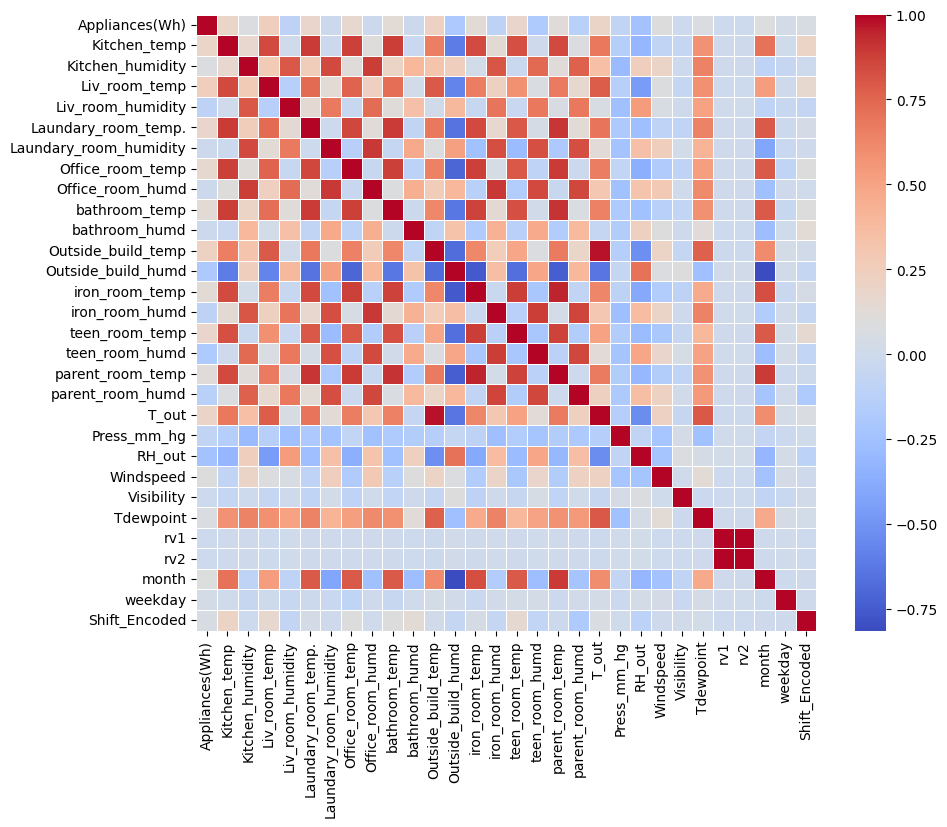

In [58]:

plt.figure(figsize=(10,8))

sns.heatmap(correaltion_marix, annot=False, cmap='coolwarm', linewidths=0.5, cbar=True)

## Key insights from the heatmap

1) Strong Correlation Between Room Temperatures and Appliance Energy Consumption:

There is a strong positive correlation between the Appliances(Wh) (energy consumption) and room temperatures, such as Kitchen_temp, Liv_room_temp, and Laundry_room_temp. This suggests that as the temperature in various rooms increases, the energy consumption by appliances tends to increase as well.


2)Humidity and Temperature Correlation:

Humidity and temperature in specific rooms (e.g., Kitchen_humidity, Liv_room_humidity, Bathroom_humd) show notable correlations with their respective temperatures. For example, Kitchen_humidity correlates with Kitchen_temp, indicating that as the temperature increases, the humidity tends to follow a similar trend.

3)Environmental Factors (Outside and Indoor) Affect Appliance Usage:

Features like Outside_build_temp and iron_room_temp are positively correlated with Appliances(Wh). This suggests that external and internal room temperatures significantly influence the energy consumed by appliances, such as air conditioning or heating systems

4)Weak Correlation with Time-Related Features:

Time-related features like month, weekday, and Shift_Encoded show weaker correlations with appliance energy usage. This suggests that the day of the week, the month, or shift timing has a less direct effect on the energy consumption of appliances.

5)Weak Correlation with Time-Related Features:

Time-related features like month, weekday, and Shift_Encoded show weaker correlations with appliance energy usage. This suggests that the day of the week, the month, or shift timing has a less direct effect on the energy consumption of appliances.

6)Pressure and Visibility Features:

The features related to Pressure (Press_mm_hg) and Visibility do not seem to have strong correlations with Appliances(Wh). These may not be as useful for predicting energy consumption compared to room temperature or humidity features.

## From he corelaion marix we can see that rv1 and rv2 have same numeric values and the co realtion with the target variable is negligible so we can remove thoose feaures

In [59]:
encoded_df.drop(['rv1','rv2'], axis=1, inplace=True)

## Feature scaling

In [60]:
#Initializing the scaler
scalar = StandardScaler()
scaled_df = scalar.fit_transform(encoded_df)

In [61]:
scaled_df = pd.DataFrame(scaled_df,columns=encoded_df.columns)

In [62]:
scaled_df.head()

,Appliances(Wh),Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,...,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,Shift_Encoded
0,-0.283101,-1.139072,1.863478,-0.504143,1.092582,-1.245155,1.686863,-0.912635,1.506438,-1.349960,...,0.958298,-0.147777,-2.684267,0.878312,1.204799,1.799947,0.367016,-1.569369,-1.499445,0.410306
1,-0.283101,-1.139072,1.634348,-0.504143,1.075633,-1.245155,1.705307,-0.912635,1.604528,-1.349960,...,0.965526,-0.170232,-2.684267,0.878312,1.099436,1.799947,0.343175,-1.569369,-1.499445,0.410306
2,-0.606606,-1.139072,1.534580,-0.504143,1.051570,-1.245155,1.749367,-0.948663,1.580918,-1.349960,...,0.951070,-0.192686,-2.684267,0.878312,0.991404,1.687977,0.319333,-1.569369,-1.499445,0.410306
3,-0.606606,-1.139072,1.475395,-0.504143,1.042363,-1.245155,1.769859,-0.966677,1.542526,-1.349960,...,0.926976,-0.215141,-2.684267,0.878312,0.880491,1.320076,0.295491,-1.569369,-1.499445,0.410306
4,-0.283101,-1.139072,1.543034,-0.504143,1.027297,-1.245155,1.769859,-0.966677,1.497991,-1.330439,...,0.926976,-0.237595,-2.684267,0.878312,0.766451,0.952175,0.271649,-1.569369,-1.499445,0.410306


## Spliing the dataset

In [63]:
X = scaled_df.drop('Appliances(Wh)', axis=1)  # Features (all columns except the target)
y = scaled_df['Appliances(Wh)'] # Target variable

In [64]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Print the shape of the split datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (15788, 27)
Testing set size: (3947, 27)
